In [1]:
#The healthy and diseased dataset of plants is available on google drive so this code is used to access drive from collab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [16]:
#Dataset paths defined
train_dir = '/content/drive/MyDrive/TR'  #TR path
test_dir = '/content/drive/MyDrive/TT'    #TS path

In [3]:
import os
print(len(os.listdir('/content/drive/MyDrive/TR/healthy')))
print(len(os.listdir('/content/drive/MyDrive/TR/diseased')))
print(len(os.listdir('/content/drive/MyDrive/TT/healthy')))
print(len(os.listdir('/content/drive/MyDrive/TT/diseased')))

146
258
230
270


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Training set image data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  #Validation, 20% split
)

#prepare and load the training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  #healthy and diseased 'binary'
    subset='training'  #training set specified as 'training'
)

#validation set image data generator
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  #Validation, 20% split
)

#prepare and load the validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  #validation data specified as 'validation'
)

Found 324 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [5]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [6]:
#Custom CNN model creation

model = Sequential()

#model.add(BatchNormalization()) has been added to reduce overfitting
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3))) #32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

#model.add(Dropout(0.1)) has been added to reduce overfitting
model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  #Output layer

In [7]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy is binary classification for healthy and diseased plants

In [8]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
11/11 [==============================] - 97s 8s/step - loss: 1.0173 - accuracy: 0.5679 - val_loss: 0.6476 - val_accuracy: 0.6375
Epoch 2/30
11/11 [==============================] - 51s 5s/step - loss: 0.6460 - accuracy: 0.6389 - val_loss: 0.5958 - val_accuracy: 0.6375
Epoch 3/30
11/11 [==============================] - 49s 5s/step - loss: 0.6470 - accuracy: 0.6512 - val_loss: 0.4259 - val_accuracy: 0.6500
Epoch 4/30
11/11 [==============================] - 49s 4s/step - loss: 0.6458 - accuracy: 0.6975 - val_loss: 0.4682 - val_accuracy: 0.6125
Epoch 5/30
11/11 [==============================] - 49s 4s/step - loss: 0.5427 - accuracy: 0.7130 - val_loss: 0.4035 - val_accuracy: 0.7250
Epoch 6/30
11/11 [==============================] - 49s 4s/step - loss: 0.4344 - accuracy: 0.7932 - val_loss: 0.2710 - val_accuracy: 0.8250
Epoch 7/30
11/11 [==============================] - 51s 5s/step - loss: 0.3755 - accuracy: 0.8333 - val_loss: 0.5128 - val_accuracy: 0.7500
Epoch 8/30
11/11 [==

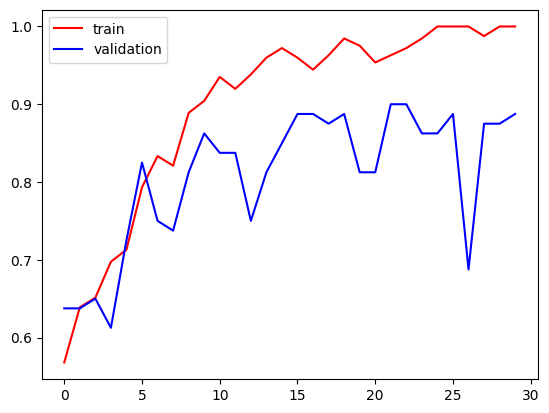

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


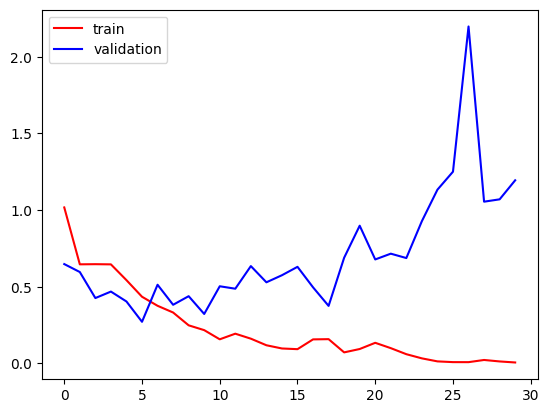

In [10]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)


Found 500 images belonging to 2 classes.


In [18]:
#predicting the test data
predictions = model.predict(test_data)
print(predictions)


16/16 [==============================] - 61s 4s/step
[[3.59726251e-32]
 [2.02328131e-13]
 [1.68619775e-30]
 [9.99971747e-01]
 [1.00000000e+00]
 [9.97375965e-01]
 [4.19165492e-01]
 [9.99897897e-01]
 [0.00000000e+00]
 [9.60547507e-01]
 [4.18968085e-07]
 [5.23103229e-17]
 [1.00000000e+00]
 [6.45797372e-01]
 [7.72324316e-13]
 [3.09825178e-27]
 [7.91675063e-08]
 [5.95791958e-30]
 [1.80296222e-09]
 [9.99978304e-01]
 [1.00000000e+00]
 [1.27446475e-24]
 [1.87228885e-10]
 [1.66144141e-03]
 [2.23851243e-10]
 [1.00000000e+00]
 [1.22777829e-18]
 [1.00000000e+00]
 [9.99999523e-01]
 [0.00000000e+00]
 [7.76554644e-17]
 [9.75218534e-01]
 [1.00000000e+00]
 [9.99864519e-01]
 [2.45403356e-20]
 [1.05936835e-18]
 [1.35906276e-07]
 [1.00000000e+00]
 [2.07034712e-19]
 [1.02607983e-11]
 [1.08969853e-19]
 [9.99996185e-01]
 [2.58826614e-16]
 [5.85383342e-09]
 [9.97740924e-01]
 [1.00000000e+00]
 [9.99842525e-01]
 [1.48407340e-01]
 [9.99439180e-01]
 [9.99847889e-01]
 [5.45076675e-20]
 [1.00000000e+00]
 [4.5308022

In [19]:
len(predictions)

500

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

# There is ground truth labels assumed as true_labels and predicted labels assumed as (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

#Confusion Matrix (CM)
cm = confusion_matrix(true_labels, predicted_labels)

#Show CM
print("Confusion Matrix:")
print(cm)

#Show classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))



Confusion Matrix:
[[157 113]
 [129 101]]
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.58      0.56       270
           1       0.47      0.44      0.45       230

    accuracy                           0.52       500
   macro avg       0.51      0.51      0.51       500
weighted avg       0.51      0.52      0.51       500



In [23]:
#Dataset paths defined
train_dir = '/content/drive/MyDrive/TR'  #TR path
test_dir = '/content/drive/MyDrive/TT'    #TS path

In [24]:
import os
print(len(os.listdir('/content/drive/MyDrive/TR/healthy')))
print(len(os.listdir('/content/drive/MyDrive/TR/diseased')))
print(len(os.listdir('/content/drive/MyDrive/TT/healthy')))
print(len(os.listdir('/content/drive/MyDrive/TT/diseased')))

146
258
230
270


In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Training set image data generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  #Validation, 20% split
)

#prepare and load the training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  #healthy and diseased 'binary'
    subset='training'  #training set specified as 'training'
)

#validation set image data generator
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  #Validation, 20% split
)

#prepare and load the validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  #validation data specified as 'validation'
)

Found 324 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [26]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False,
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #The layers is ResNet50 is not trainable so the weights are kept as it is and add new I/P, other layers
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))


94765736/94765736 [==============================] - 0s 0us/step


In [27]:
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_3 (Dense)             (None, 512)               1049088   
                                                                 
 dense_4 (Dense)             (None, 1)                 513       
                                                                 
Total params: 24637313 (93.98 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [28]:

from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy is binary classification (healthy and diseased)


In [29]:
history = resnet_model.fit(train_data, epochs=3, validation_data=validation_data)

Epoch 1/3
11/11 [==============================] - 112s 10s/step - loss: 4.6114 - accuracy: 0.5463 - val_loss: 2.8558 - val_accuracy: 0.3625
Epoch 2/3
11/11 [==============================] - 102s 9s/step - loss: 1.7300 - accuracy: 0.5123 - val_loss: 1.8988 - val_accuracy: 0.3625
Epoch 3/3
11/11 [==============================] - 117s 11s/step - loss: 1.0676 - accuracy: 0.5093 - val_loss: 0.6990 - val_accuracy: 0.5875


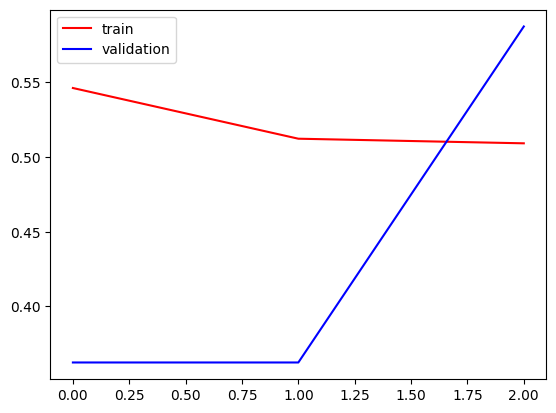

In [30]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


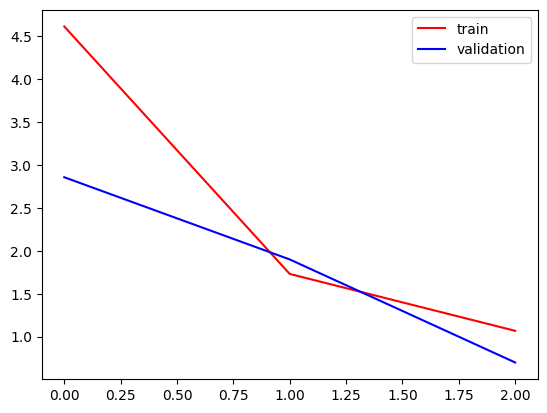

In [31]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [32]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 500 images belonging to 2 classes.


In [33]:
#predicting the test data
predictions = resnet_model.predict(test_data)
print(predictions)

16/16 [==============================] - 131s 8s/step
[[0.30406263]
 [0.30842882]
 [0.23172611]
 [0.43172893]
 [0.36017656]
 [0.35621792]
 [0.2987014 ]
 [0.33082366]
 [0.4113478 ]
 [0.30045056]
 [0.34757188]
 [0.36691472]
 [0.28340805]
 [0.31182647]
 [0.602647  ]
 [0.3234011 ]
 [0.52229965]
 [0.26978722]
 [0.30657098]
 [0.31769764]
 [0.3991574 ]
 [0.5349637 ]
 [0.34461778]
 [0.33062482]
 [0.27738136]
 [0.37217835]
 [0.3012314 ]
 [0.32642707]
 [0.39695415]
 [0.42820603]
 [0.41880497]
 [0.28823206]
 [0.5235378 ]
 [0.343744  ]
 [0.3298298 ]
 [0.36654502]
 [0.43681344]
 [0.21312794]
 [0.33393112]
 [0.24539374]
 [0.28234878]
 [0.29388088]
 [0.33632237]
 [0.40551308]
 [0.26055762]
 [0.29350138]
 [0.43845883]
 [0.3915254 ]
 [0.24847098]
 [0.29278806]
 [0.3781027 ]
 [0.41624677]
 [0.29477468]
 [0.30970803]
 [0.40553364]
 [0.36578456]
 [0.40952978]
 [0.26350778]
 [0.30382022]
 [0.42144948]
 [0.27372313]
 [0.41054562]
 [0.3172641 ]
 [0.37042668]
 [0.37007815]
 [0.44470778]
 [0.36518273]
 [0.5444

In [34]:
len(predictions)

500

In [35]:
from sklearn.metrics import confusion_matrix, classification_report


# There is ground truth labels assumed as true_labels and predicted labels assumed as predictions
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

#Confusion Matrix (CM)
cm = confusion_matrix(true_labels, predicted_labels)

#Show CM
print("Confusion Matrix:")
print(cm)

#Show classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[252  18]
 [224   6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.93      0.68       270
           1       0.25      0.03      0.05       230

    accuracy                           0.52       500
   macro avg       0.39      0.48      0.36       500
weighted avg       0.40      0.52      0.39       500

